<a href="https://colab.research.google.com/github/Akash743/Mathematical-Optimization/blob/main/Testing_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_excel('testing.xlsx',sheet_name="Raw")

df.head()

,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,EndPeriod,dv,Covid_index,...,Meta_video,Meta_nonvideo,YT,TikTok,TV_news,TV_ent,Own_digital_1,Own_digital_2,Insta_all,Insta_own
0,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,43831,712379.734440,0.00000,...,0.0,0.0,0.0,0.0,5788,0.0,22537,0,40497.0,0
1,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,43832,715694.909520,0.00000,...,0.0,0.0,0.0,0.0,4492,0.0,18279,0,41305.5,0
2,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,43833,670894.701600,3.39251,...,0.0,0.0,0.0,0.0,4881,0.0,17170,0,32530.5,0
3,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,43834,718422.623484,3.39251,...,0.0,0.0,0.0,0.0,5842,0.0,20261,0,32502.0,0
4,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,43835,732491.460708,3.39251,...,0.0,0.0,0.0,0.0,4351,0.0,18472,0,30760.5,0


In [4]:
df.columns = ['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score','Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'TV_news_grp',
       'TV_ent_grp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']


useful = ['DAU', 'Covid_index', 'Brand_score','Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'TV_news_grp',
       'TV_ent_grp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              700 non-null    object 
 1   Month_Year         700 non-null    object 
 2   Week               700 non-null    object 
 3   Week2              700 non-null    object 
 4   Year               700 non-null    int64  
 5   month_nr           700 non-null    int64  
 6   week_nr            700 non-null    int64  
 7   EndPeriod          700 non-null    int64  
 8   DAU                700 non-null    float64
 9   Covid_index        700 non-null    float64
 10  Brand_score        700 non-null    float64
 11  Vouchers_P1        700 non-null    float64
 12  Vouchers_P2        700 non-null    float64
 13  Meta_video_imp     700 non-null    float64
 14  Meta_nonvideo_imp  700 non-null    float64
 15  YT_imp             700 non-null    float64
 16  TikTok_imp         700 non

In [6]:
df[useful].describe().T


,count,mean,std,min,25%,50%,75%,max
DAU,700.0,2.654701e+06,1.419001e+06,652388.164968,1.278279e+06,2.611585e+06,3.802836e+06,6.682087e+06
Covid_index,700.0,5.921501e+01,1.831229e+01,0.000000,5.747695e+01,6.303327e+01,7.436339e+01,7.572257e+01
Brand_score,700.0,7.513131e+01,1.344567e+01,29.487051,6.912662e+01,7.757404e+01,8.376517e+01,9.715482e+01
Vouchers_P1,700.0,1.986806e+05,1.633119e+05,0.000000,8.545800e+04,1.469678e+05,2.979169e+05,8.573055e+05
Vouchers_P2,700.0,8.865817e+04,4.074714e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,4.469580e+06
Meta_video_imp,700.0,1.507632e+04,3.973948e+04,0.000000,0.000000e+00,0.000000e+00,9.921000e+03,2.136240e+05
Meta_nonvideo_imp,700.0,1.239212e+04,3.736572e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.181420e+05
YT_imp,700.0,3.576948e+04,6.206276e+04,0.000000,0.000000e+00,0.000000e+00,5.126250e+04,2.714505e+05
TikTok_imp,700.0,1.593573e+04,4.258956e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.805615e+05
TV_news_grp,700.0,4.218887e+04,5.799845e+04,0.000000,0.000000e+00,7.645500e+03,7.968150e+04,3.645480e+05


In [13]:
len(useful)

15

In [8]:
dfm = df.groupby(by='Month_Year').sum()

Text(0.5, 0, 'DAU')

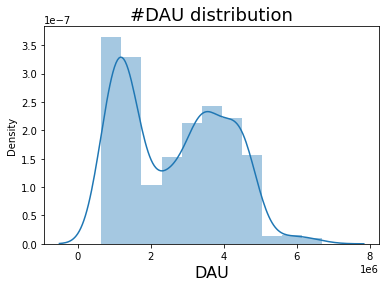

In [11]:
sns.distplot(df['DAU'],kde = True)
plt.title('#DAU distribution', fontsize=18)
plt.xlabel('DAU', fontsize=16)
#plt.ylabel('Frequency', fontsize=16)

In [16]:
df.columns

Index(['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod', 'DAU', 'Covid_index', 'Brand_score', 'Vouchers_P1',
       'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp', 'YT_imp',
       'TikTok_imp', 'TV_news_grp', 'TV_ent_grp', 'Own_digital_1_imp',
       'Own_digital_2_imp', 'Insta_all_imp', 'Insta_own_imp'],
      dtype='object')

In [18]:
df.Week

0      01 WK 2020
1      01 WK 2020
2      01 WK 2020
3      01 WK 2020
4      01 WK 2020
          ...    
695    52 WK 2021
696    52 WK 2021
697    52 WK 2021
698    52 WK 2021
699    52 WK 2021
Name: Week, Length: 700, dtype: object

**Grouping for IVs(except Brand Score, covid, DAU) is done along their weekly sum **

In [34]:
#Averaging dv,brand_score, covid_index
#Summing rest all
date_cols = ['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod']
df_dv = df[['Week2','Month_Year','Year','DAU','Brand_score','Covid_index']].groupby(by='Week2').mean()
df_iv = df[[x for x in df.columns if x not in ['DAU','Brand_score','Covid_index','Year','month_nr', 'week_nr',
       'EndPeriod']]].groupby('Week2').sum()
dff = pd.concat([df_iv,df_dv[['DAU','Brand_score','Covid_index']]],axis=1)

In [35]:
dff.columns

Index(['Vouchers_P1', 'Vouchers_P2', 'Meta_video_imp', 'Meta_nonvideo_imp',
       'YT_imp', 'TikTok_imp', 'TV_news_grp', 'TV_ent_grp',
       'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp',
       'Insta_own_imp', 'DAU', 'Brand_score', 'Covid_index'],
      dtype='object')

In [36]:
dff = dff.reset_index()   #as Week 2 became the index on grouping df on that.

In [37]:
dff['Year'] = dff['Week2'].apply(lambda x: int(x[-4:]) )

In [38]:
dff = dff[['Week2','Year','DAU', 'Brand_score', 'Covid_index', 'Vouchers_P1', 'Vouchers_P2', 'Meta_video_imp',
       'Meta_nonvideo_imp', 'YT_imp', 'TikTok_imp', 'TV_news_grp',
       'TV_ent_grp', 'Own_digital_1_imp', 'Own_digital_2_imp', 'Insta_all_imp',
       'Insta_own_imp']]

In [15]:
dff.shape,df_dv.shape,df_iv.shape

((102, 19), (102, 4), (102, 16))

In [81]:
dff = pd.read_csv('weekly_grouped_data.csv')
dff = dff.iloc[:,1:]

In [82]:
dff.head()

,Week2,Year,DAU,Brand_score,Covid_index,Vouchers_P1,Vouchers_P2,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,TV_news_grp,TV_ent_grp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,WEEK 01 2020,2020,709976.6860,29.603407,2.035506,436939.5,0.0,0.0,0.0,0.0,0.0,25354,0.0,96719,0,177595.5,0
1,WEEK 02 2020,2020,742445.7669,43.270272,3.392510,324385.5,0.0,0.0,0.0,0.0,0.0,49478,0.0,177158,0,276222.0,0
2,WEEK 03 2020,2020,810328.1152,44.899086,3.880261,890158.5,0.0,0.0,0.0,0.0,0.0,80489,0.0,147509,0,316443.0,0
3,WEEK 04 2020,2020,709779.2725,41.746858,5.099639,765492.0,0.0,0.0,0.0,0.0,0.0,47633,0.0,153474,0,255862.5,0
4,WEEK 05 2020,2020,787788.3795,43.188335,7.522860,1119343.5,0.0,0.0,0.0,0.0,0.0,62818,0.0,190158,0,277050.0,0


<Figure size 1584x360 with 0 Axes>

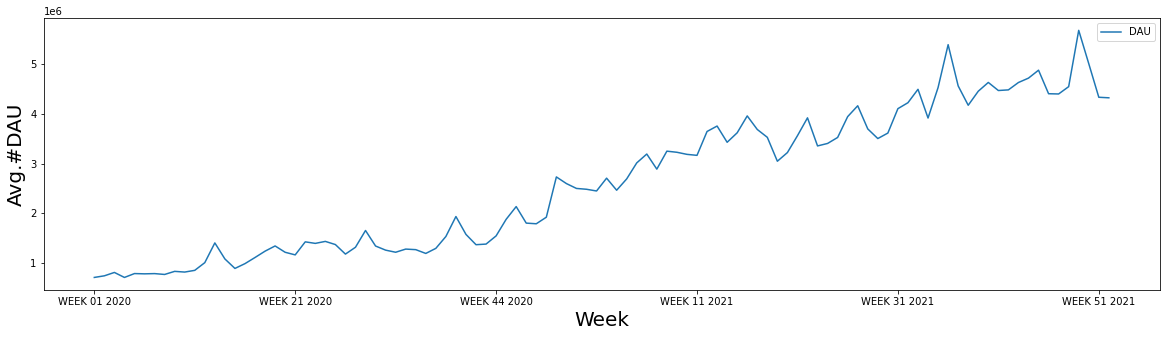

In [83]:
f= plt.figure(figsize=(22,5))
p = dff[['DAU','Week2']].set_index('Week2').plot(legend=True);#
p.set_xlabel("Week", fontsize = 20)
p.set_ylabel("Avg.#DAU", fontsize = 20)
plt.gcf().set_size_inches(20, 5)
#plt.show()

In [75]:
df['Year'].value_counts()

2021    365
2020    335
Name: Year, dtype: int64

<Figure size 1296x216 with 0 Axes>

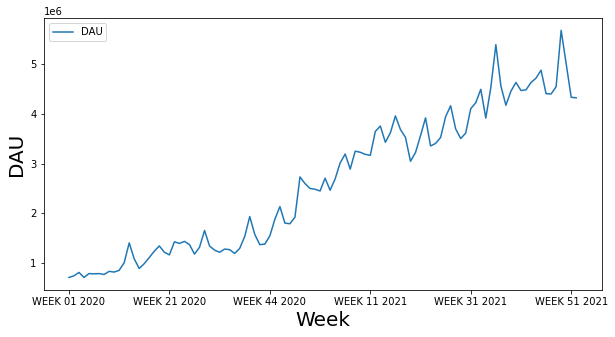

<Figure size 1296x216 with 0 Axes>

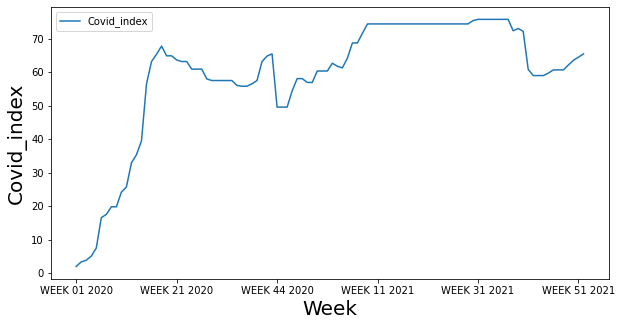

<Figure size 1296x216 with 0 Axes>

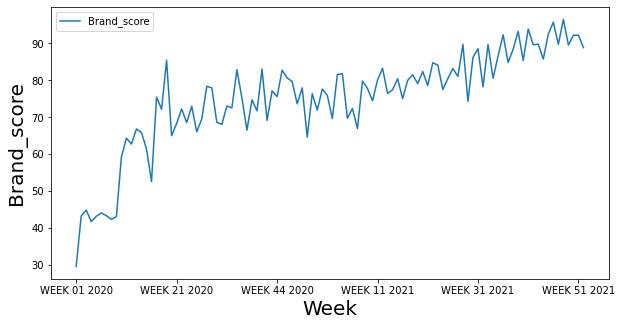

<Figure size 1296x216 with 0 Axes>

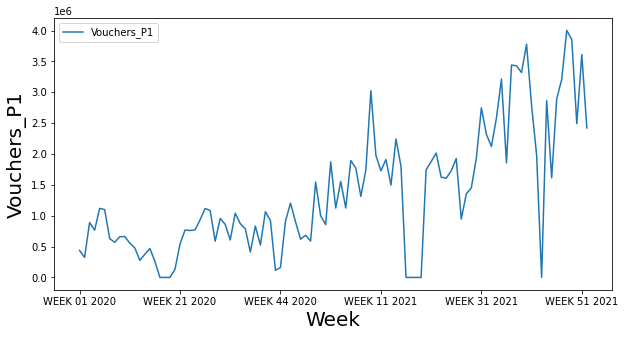

<Figure size 1296x216 with 0 Axes>

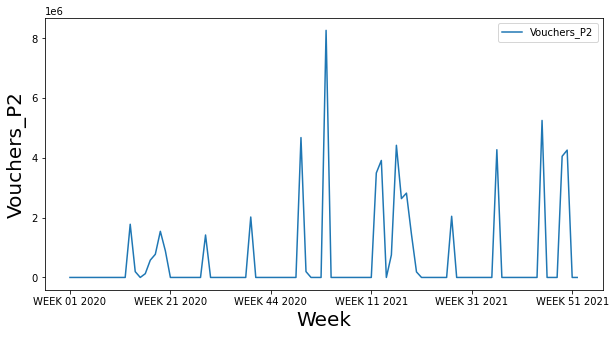

<Figure size 1296x216 with 0 Axes>

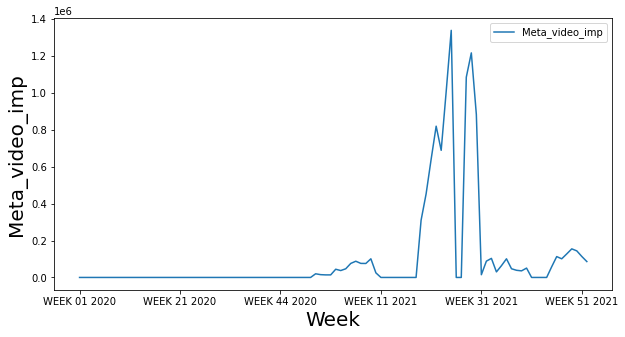

<Figure size 1296x216 with 0 Axes>

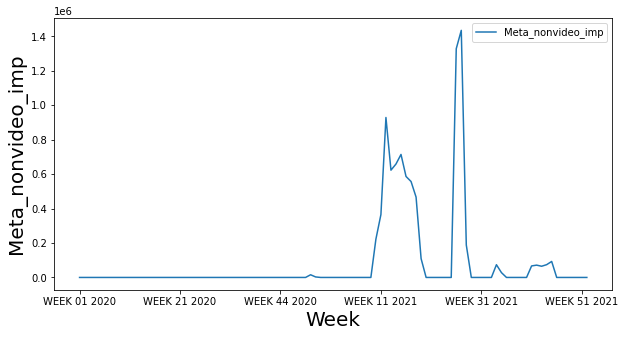

<Figure size 1296x216 with 0 Axes>

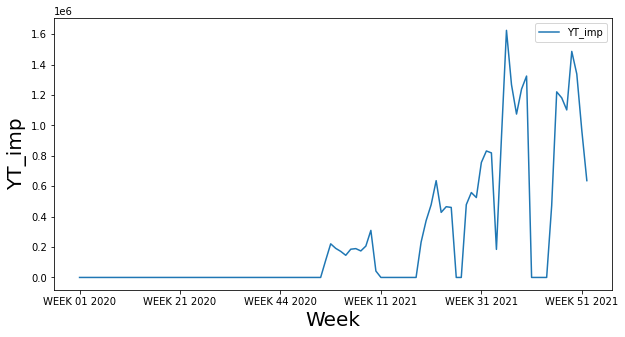

<Figure size 1296x216 with 0 Axes>

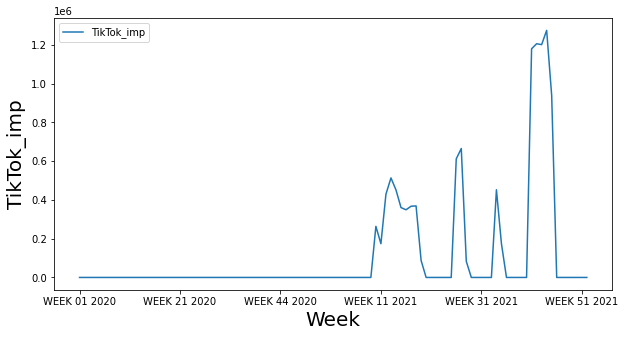

<Figure size 1296x216 with 0 Axes>

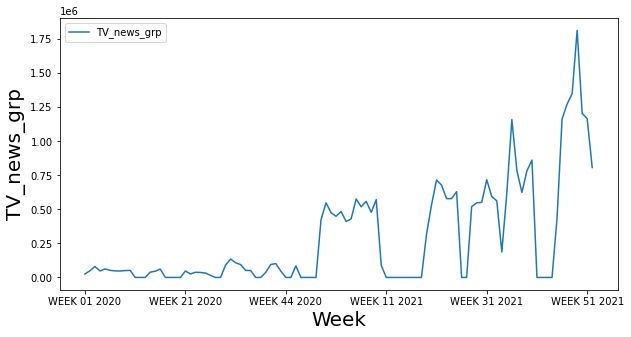

<Figure size 1296x216 with 0 Axes>

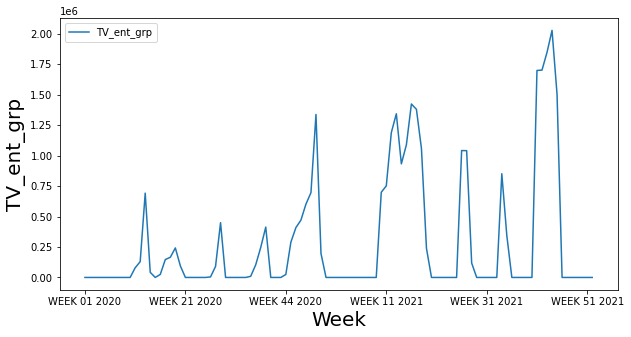

<Figure size 1296x216 with 0 Axes>

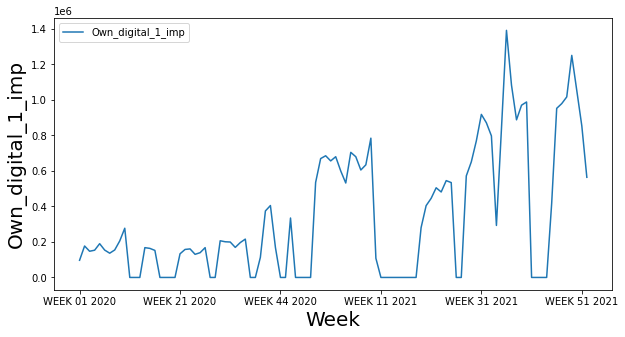

<Figure size 1296x216 with 0 Axes>

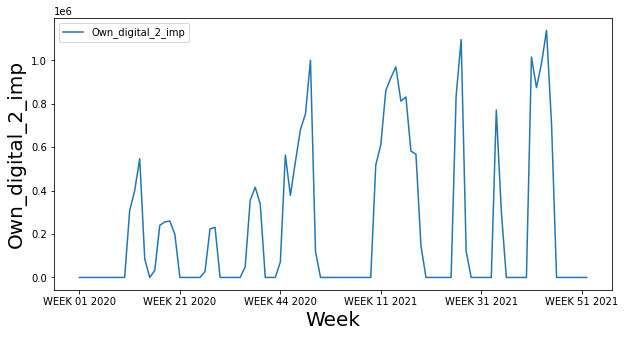

<Figure size 1296x216 with 0 Axes>

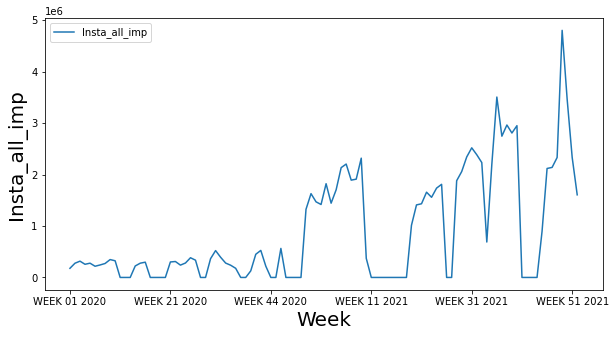

<Figure size 1296x216 with 0 Axes>

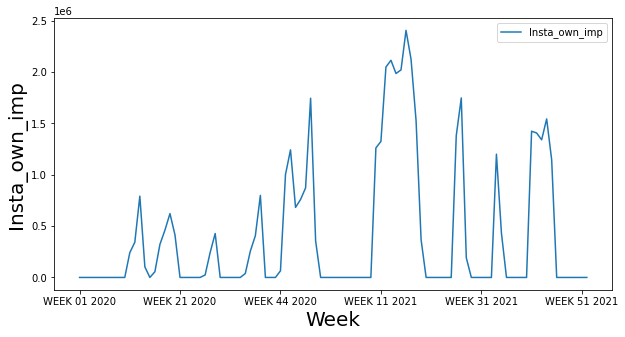

In [76]:
for i in dff[useful]:
  f= plt.figure(figsize=(18,3))
  p = dff[[i,"Week2"]].set_index('Week2').plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel(i, fontsize = 20)
  plt.gcf().set_size_inches(10, 5)

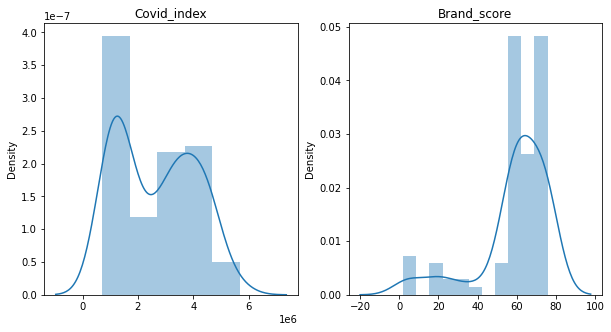

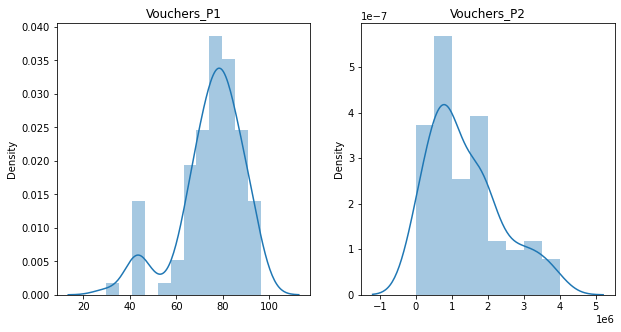

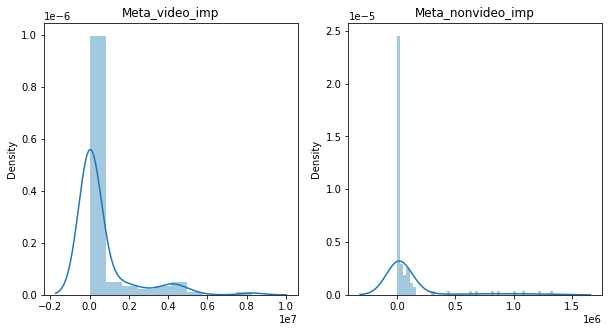

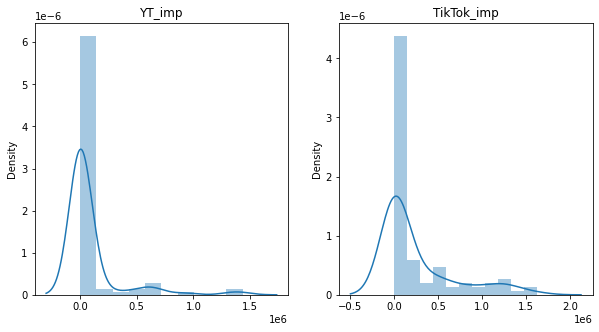

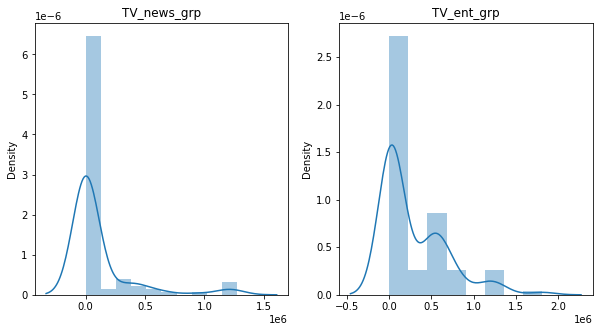

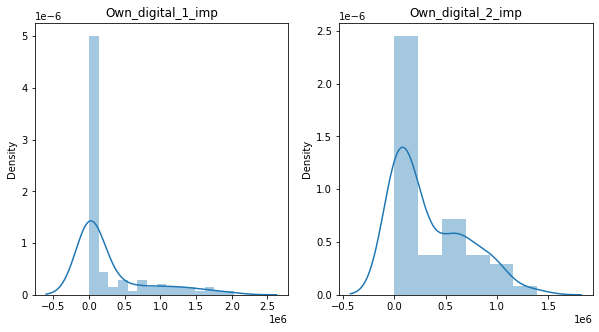

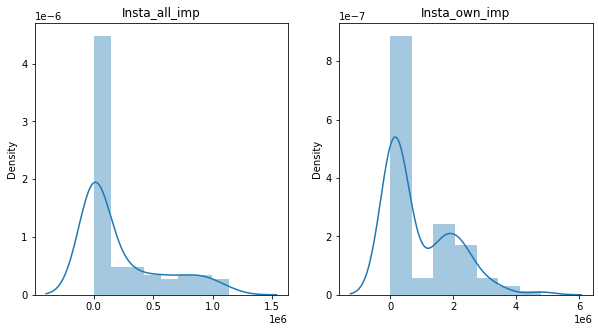

In [118]:
#Distribution PLots for all
import seaborn as sns
dfu = dff[useful]

for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)
  # fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
  # axes[0].plot(x1, y1)
  # axes[1].plot(x2, y2)
  # fig.tight_layout()
  # #f= plt.figure(figsize=(18,3))
  # sns.distplot(dff[i])

Bivariate Analysis

In [ ]:
for i in range(0,len(dfu.columns)-1,2):
  #dfu[[dfu.columns[i]] = dfu[dfu.columns[i]].astype(float)
  #dfu[dfu.columns[i]].astype(float)
  #fig, ax = plt.subplots(1, 3)
  fig, axes = plt.subplots(1,2)#figsize=(10, 3))
  sns.distplot(dfu, x=dfu[dfu.columns[i]], ax=axes[0])
  sns.distplot(dfu, x=dfu[dfu.columns[i+1]], ax=axes[1])
  i+=1
  axes[0].set_title(useful[i])
  axes[1].set_title(useful[i+1])
  #plt.suptitle("Main")
  plt.gcf().set_size_inches(10, 5)

In [119]:
useful

['DAU',
 'Covid_index',
 'Brand_score',
 'Vouchers_P1',
 'Vouchers_P2',
 'Meta_video_imp',
 'Meta_nonvideo_imp',
 'YT_imp',
 'TikTok_imp',
 'TV_news_grp',
 'TV_ent_grp',
 'Own_digital_1_imp',
 'Own_digital_2_imp',
 'Insta_all_imp',
 'Insta_own_imp']

In [123]:
df.head(2)



,Month,Month_Year,Week,Week2,Year,month_nr,week_nr,EndPeriod,DAU,Covid_index,...,Meta_video_imp,Meta_nonvideo_imp,YT_imp,TikTok_imp,TV_news_grp,TV_ent_grp,Own_digital_1_imp,Own_digital_2_imp,Insta_all_imp,Insta_own_imp
0,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,1970-01-01 00:00:00.000043831,712379.73444,0.0,...,0.0,0.0,0.0,0.0,5788,0.0,22537,0,40497.0,0
1,January,JANUARY 2020,01 WK 2020,WEEK 01 2020,2020,1,1,1970-01-01 00:00:00.000043832,715694.90952,0.0,...,0.0,0.0,0.0,0.0,4492,0.0,18279,0,41305.5,0


In [122]:
df['EndPeriod'] = pd.to_datetime(df['EndPeriod'])

<Figure size 2160x576 with 0 Axes>

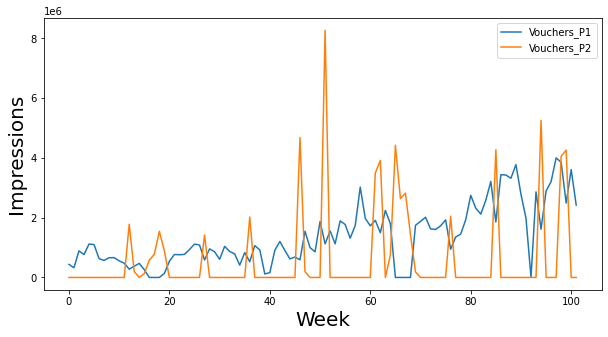

<Figure size 2160x576 with 0 Axes>

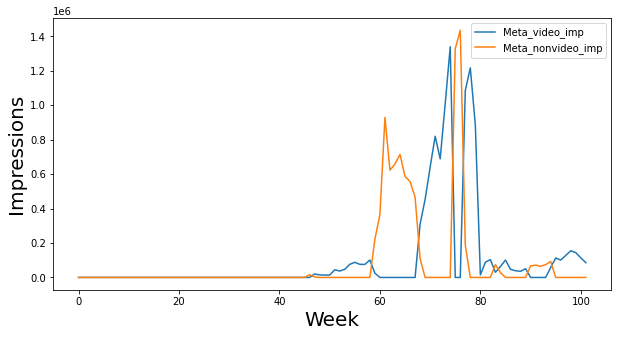

<Figure size 2160x576 with 0 Axes>

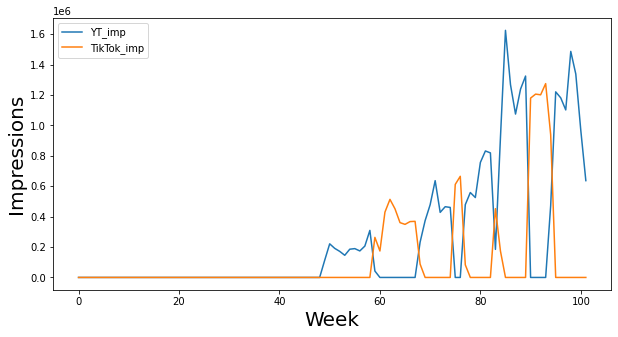

<Figure size 2160x576 with 0 Axes>

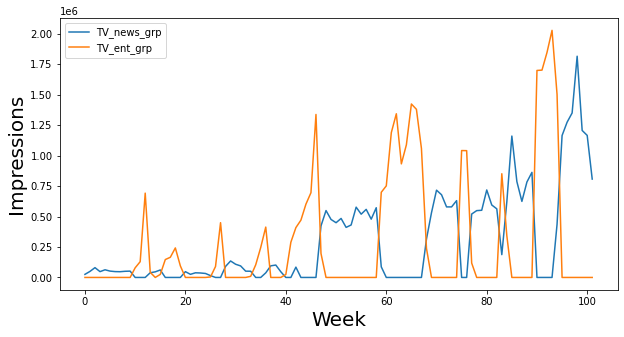

<Figure size 2160x576 with 0 Axes>

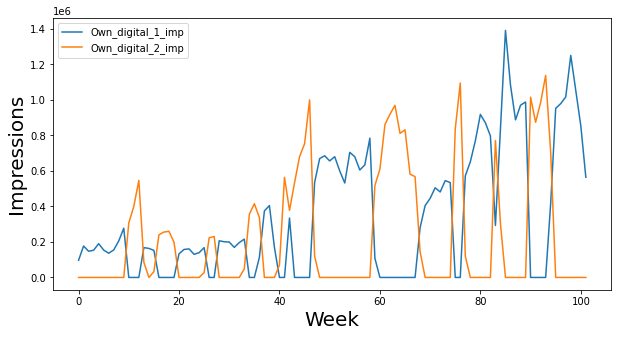

<Figure size 2160x576 with 0 Axes>

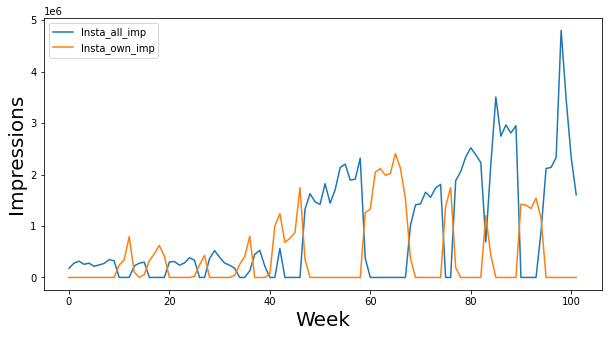

In [120]:
for i in range(3,len(dfu.columns)-1,2):
#  f= plt.figure(figsize=(18,3))
#   p = dff[i].plot(legend=True);
#   p.set_xlabel("Week", fontsize = 20)
#   p.set_ylabel(i, fontsize = 20)


  f = plt.figure(figsize=(30,8))
  p = dff[useful[i:i+2]].plot(legend=True);
  p.set_xlabel("Week", fontsize = 20)
  p.set_ylabel("Impressions", fontsize = 20);
  plt.gcf().set_size_inches(10, 5)
#dff[['Insta_own_imp','Insta_all_imp']].plot()

In [69]:
dff.groupby(by='Year').mean().['Insta_all_imp'].hist()

SyntaxError: ignored

Text(0, 0.5, '#DAU')

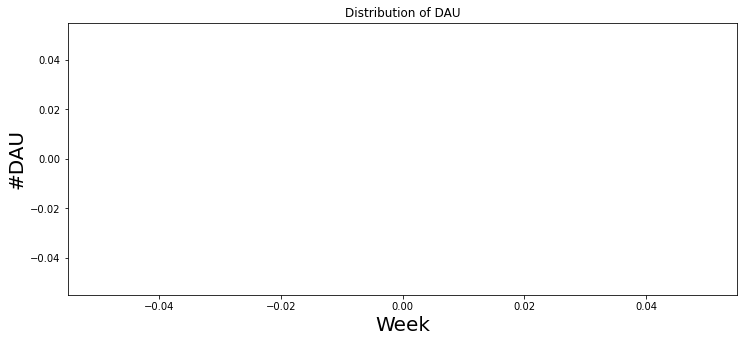

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f= plt.figure(figsize=(12,5))
p = sns.lineplot(dfg['DAU'],color='c')
p.set_title('Distribution of DAU')
p.set_xlabel("Week2", fontsize = 20)
p.set_ylabel("#DAU", fontsize = 20)

In [ ]:

f= plt.figure(figsize=(12,5))
#p = sns.lineplot(dfg['DAU'],color='c')
p =sns.lineplot(x='Year',y='DAU',color='c')

p.set_title('Distribution of DAU')
p.set_xlabel("Week", fontsize = 20)
p.set_ylabel("#DAU", fontsize = 20)

ValueError: ignored

<Figure size 864x360 with 0 Axes>

In [ ]:
df['BRAND'] = df["BRAND"]+.000003*df['dv']
df["dv"] = df["dv"]*.94567 
df[['PERMKT_E2_type7_E3_bau_net_hlflfe3_satpnt1_stpness1.25']] = df[['PERMKT_E2_type7_E3_bau_net_hlflfe3_satpnt1_stpness1.25']]+ df["dv"]*.1

NameError: ignored

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_heatmap = df.drop(['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod',"Week","GRI_extfactor"],axis=1)

fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(df_heatmap.corr(),annot=True,linewidths=.5, ax=ax)

In [ ]:
xf = df.drop(['Month', 'Month_Year', 'Week', 'Week2', 'Year', 'month_nr', 'week_nr',
       'EndPeriod',"Week",'dv',"GRI_extfactor","PERMKT_E2_type6_E3_bau_net_hlflfe15_satpnt0.7_stpness1",
       "PERMKT_E2_type4_E3_mega_net_hlflfe3_satpnt0.7_stpness0.75","PERMKT_E2_type4_E3_bau_net_hlflfe12_satpnt0.5_stpness1.25","PERMKT_E2_type7_E3_mega_net_hlflfe12_satpnt0.6_stpness1.25"],axis=1)  #,"PERMKT_E2_type7_E3_mega_net_hlflfe12_satpnt0.6_stpness1.25"
yf = df[['dv']]

In [ ]:
xf.shape,yf.shape

((700, 9), (700, 1))

In [ ]:
xf = sm.add_constant(xf)
modelf = sm.OLS(yf,xf)

In [ ]:
resultsf = modelf.fit()
resultsf.params

const                                                         1.071043e+06
BRAND                                                         3.100831e+04
VOUCHERS_E3_bau_net                                           5.482348e+00
VOUCHERS_E3_mega_net                                          4.891564e-01
PERMKT_E2_type9_E3_bau_net_hlflfe15_satpnt0.6_stpness1.25     7.071572e-01
PERMKT_E2_type9_E3_mega_net_hlflfe15_satpnt0.7_stpness1.25    7.779062e-01
PERMKT_E2_type8_E3_bau_net_hlflfe3_satpnt0.8_stpness1.25      3.294748e+00
PERMKT_E2_type8_E3_mega_net_hlflfe15_satpnt0.6_stpness1.25    3.148660e-01
PERMKT_E2_type6_E3_mega_net_hlflfe3_satpnt0.5_stpness1.25     1.506597e+00
PERMKT_E2_type7_E3_bau_net_hlflfe3_satpnt1_stpness1.25        1.277354e+00
dtype: float64

In [ ]:
print(resultsf.summary())

                            OLS Regression Results                            
Dep. Variable:                     dv   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     317.5
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          1.49e-238
Time:                        13:21:00   Log-Likelihood:                -10308.
No. Observations:                 700   AIC:                         2.064e+04
Df Residuals:                     690   BIC:                         2.068e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

# New Section

In [ ]:
df['BRAND']

0     -39.721121
1     -39.717831
2     -39.762291
3     -39.715124
4     -39.701162
         ...    
695    12.527115
696    12.422954
697    12.290323
698    12.323842
699    12.297524
Name: BRAND, Length: 700, dtype: float64

In [ ]:
xm = dfm.drop(["Week",'dv',"GRI_extfactor","OM_E1_platformsb1_imp","OM_E1_platformsb2_imp","TV_grp","TVSPN_grp","PERMKT_E2_type6_net"],axis=1)

ym = dfm[['dv']]

xm.shape,ym.shape

Xm_with_constant = sm.add_constant(xm)
modelm = sm.OLS(ym,xm)



In [ ]:
resultsm = modelm.fit()
resultsm.params

BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

In [ ]:
print(resultsm.summary())


                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:39:18   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

((105, 7), (105, 1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


BRAND                    106890.640621
PERMKT_E2_type4_net           4.522923
PERMKT_E2_type7_net           0.710966
PERMKT_E2_type8_net           0.944793
PERMKT_E2_type9_net           0.388055
OM_E1_platformsb3_imp         0.002137
TVFREE_grp                  821.610556
dtype: float64

                                 OLS Regression Results                                
Dep. Variable:                     dv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              718.1
Date:                Fri, 26 Aug 2022   Prob (F-statistic):                    3.29e-81
Time:                        09:35:45   Log-Likelihood:                         -1707.1
No. Observations:                 105   AIC:                                      3428.
Df Residuals:                      98   BIC:                                      3447.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------